<a href="https://colab.research.google.com/github/AdithyaR-ChemE/distillation-column-design-mccabe-thiele/blob/main/Distillation_Column.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Design of Distillation Column

## McCabe-Thiele Distillation Column Design

### Importing relevant python libraries

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
import pandas as pd
import math as m
plt.style.use('ggplot')


print("✅Libraries imported successfully")

✅Libraries imported successfully


### Input Parameters

In [59]:
# Feed Properties
F = 349.4983          # molar flow rate of feed [mol/s]
xF = 0.4402           # mole fraction of more volatile component in feed [-]
xD = 0.9744           # mole fraction in distillate [-]
xW = 0.0235           # mole fraction in bottoms [-]
alpha = 2.5           # relative volatility [-]
q = 0.333             # feed thermal condition (q-line parameter)
R_ratio = 1.6304      # reflux ratio relative to minimum reflux
rho_l_top = 880       # Density of liquid at top [kg/m3]
rho_v_top = 2.7055    # Density of vapor at top [kg/m3]
rho_l_bottom = 870    # Density of liquid at bottom [kg/m3]
rho_v_bottom = 2.9129 # Density of vapor at bottom [kg/m3]
T_top = 80.1          # Temperature at top [degC]
T_bottom = 110.6      # Temperature at bottom [degC]

# Tray Assumptions
tray_efficiency = 0.6   # typical sieve tray efficiency [-]
tray_spacing = 0.6      # tray spacing [m]

### Mass Balance

In [60]:
# Performing mass balance to find distillate and condensate flowrate

MB = np.array([[1,1],[xW,xD]]) # LHS for Overall mass balance and component mass balance
OP = np.array([[F],[xF*F]])    # RHS for Overall mass balance and component mass balance
L,D = np.linalg.solve(MB,OP)

# Verifying the values
if (L+D == F):
  print(f"Liquid Flowrate [mol/s] : {L}\nDistillate Flowrate [mol/s] : {D}")

Liquid Flowrate [mol/s] : [196.34240389]
Distillate Flowrate [mol/s] : [153.15589611]


### Generating Equilibrium curve and Minimum Reflux Graph

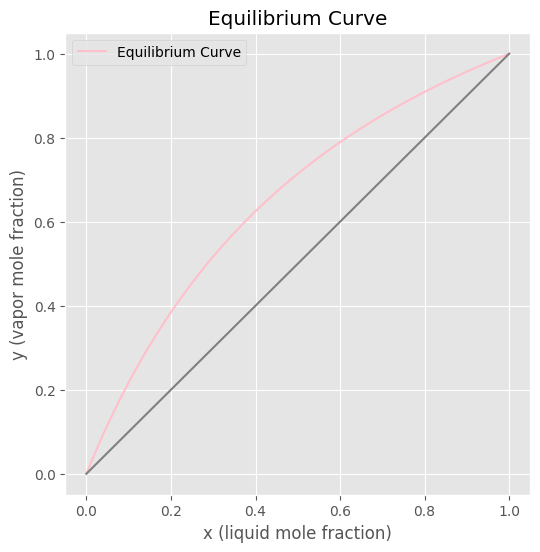

In [61]:
# Equilibrium Data (VLE curve)

# Mole fraction array for liquid
x = np.linspace(0, 1, 300)

# Binary equilibrium relation (Raoult's law / constant relative volatility)
y_eq = (alpha * x) / (1 + (alpha - 1) * x)

# Equilibrium plot
plt.figure(figsize=(6,6))
plt.plot(x, y_eq, label='Equilibrium Curve',color='pink')
plt.plot([0,1],[0,1],'', color='gray')
plt.xlabel('x (liquid mole fraction)')
plt.ylabel('y (vapor mole fraction)')
plt.title('Equilibrium Curve')
plt.legend()
plt.show()

Feed intersects at x = 0.2943, y = 0.5104


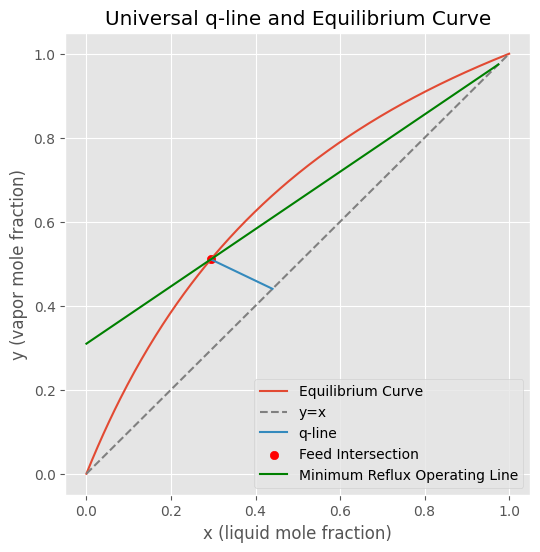

In [62]:
# x-array for plotting
x_plot = np.linspace(0, 1, 300)

# feed intersection with equilibrium curve
y_eq = (alpha * x_plot) / (1 + (alpha - 1) * x_plot)

# Finding point of intersection between q-line and equilibrium curve
if q == 1:
  x_intersect = xF
  y_intersect = alpha*xF/( 1 + (alpha - 1)*xF)
else :
  y0 = (q/(q-1)) * (x_plot - xF/q)
  y_diff = np.abs(y_eq- y0)
  idx = np.argmin(y_diff)
  x_intersect = x_plot[idx]
  y_intersect = y_eq[idx]

print(f"Feed intersects at x = {x_intersect:.4f}, y = {y_intersect:.4f}")

# Plotting
plt.figure(figsize=(6,6))
plt.plot(x_plot, y_eq, label='Equilibrium Curve')
plt.plot([0,1],[0,1],'--', color='gray', label='y=x')
if q == 1.0:
    plt.axvline(x=xF, color='green', label='q-line (vertical)')
    plt.scatter([xF],[y_intersect],color='red',label ='q-line intersection')
else:
    plt.plot([xF,x_intersect],[xF,y_intersect], label='q-line')
    plt.scatter([x_intersect], [y_intersect], color='red', label='Feed Intersection')

    slope_m_op = (xD - y_intersect)/(xD - x_intersect)
    y_axis= xD - slope_m_op*(xD-0)

    plt.plot([xD,x_intersect,0],[xD,y_intersect,y_axis],label = 'Minimum Reflux Operating Line',color = 'green')
plt.xlabel('x (liquid mole fraction)')
plt.ylabel('y (vapor mole fraction)')
plt.title('Universal q-line and Equilibrium Curve')

plt.legend()
plt.show()

### Plotting Actual Operating line

Minimum reflux ratio is : 2.1467
Actual reflux ratio is : 3.5000
Actual Feed intersects at x = 0.3472, y = 0.4866
Verification - Rectifying: 0.4866, q-line: 0.4866, diff: 0.000000


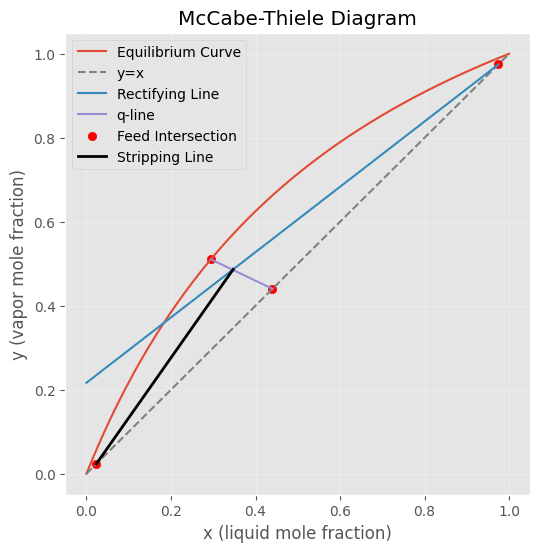

In [63]:
# -- Finding minimum reflux ratio --
R_min = xD/(y_axis)-1
R_actual = R_min*R_ratio
print(f"Minimum reflux ratio is : {R_min:.4f}")
print(f"Actual reflux ratio is : {R_actual:.4f}")

# -- Finding actual point of intersection of operating line and y-axis --
y_axis_actual = xD/(R_actual+1)

# -- Plotting actual operating line --
plt.figure(figsize=(6,6))
plt.plot(x_plot, y_eq, label='Equilibrium Curve')
plt.plot([0,1],[0,1],'--', color='gray', label='y=x')
plt.plot([xD,0],[xD,y_axis_actual], label='Rectifying Line')
plt.scatter([xW,xF,xD],[xW,xF,xD], color = 'red')

if q == 1.0:
    plt.axvline(x=xF, color='green', label='q-line (vertical)')
    plt.scatter([xF],[y_intersect],color='red',label ='q-line intersection')
else:
    plt.plot([xF,x_intersect],[xF,y_intersect], label='q-line')
    plt.scatter([x_intersect], [y_intersect], color='red', label='Feed Intersection')

# -- Calculate intersection of stripping line, q-line and rectifying line --
if q == 1:
    x_intersect_actual = xF
    y_intersect_actual = (R_actual/(R_actual+1))*xF + y_axis_actual
else:
    numerator = y_axis_actual + xF/(q-1)
    denominator = q/(q-1) - R_actual/(R_actual+1)
    x_intersect_actual = numerator / denominator
    y_intersect_actual = (R_actual/(R_actual+1))*x_intersect_actual + y_axis_actual

print(f"Actual Feed intersects at x = {x_intersect_actual:.4f}, y = {y_intersect_actual:.4f}")

# Verifying the calculation
y_check_rect = (R_actual/(R_actual+1))*x_intersect_actual + y_axis_actual
y_check_qline = (q/(q-1))*x_intersect_actual - xF/(q-1)
print(f"Verification - Rectifying: {y_check_rect:.4f}, q-line: {y_check_qline:.4f}, diff: {abs(y_check_rect-y_check_qline):.6f}")

# Plotting stripping line
plt.plot([xW, x_intersect_actual], [xW, y_intersect_actual], color='black', linewidth=2, label='Stripping Line')

# Storing the current figure to add steps in next code cell
fig1 = plt.gcf()
ax1 = plt.gca()

plt.legend()
plt.xlabel('x (liquid mole fraction)')
plt.ylabel('y (vapor mole fraction)')
plt.title('McCabe-Thiele Diagram')
plt.grid(True, alpha=0.3)

### Number of Stages

Intersection: (0.3472, 0.4866)
Stripping line slope: 1.4305
Stage 1: Last two points are: (0.9384, 0.9464) and (0.9384, 0.9744)
Stage 2: Last two points are: (0.8759, 0.8978) and (0.8759, 0.9464)
Stage 3: Last two points are: (0.7785, 0.8220) and (0.7785, 0.8978)
Stage 4: Last two points are: (0.6488, 0.7211) and (0.6488, 0.8220)
Stage 5: Last two points are: (0.5085, 0.6120) and (0.5085, 0.7211)
Stage 6: Last two points are: (0.3869, 0.5174) and (0.3869, 0.6120)
Stage 7: Last two points are: (0.3002, 0.4193) and (0.3002, 0.5174)
Stage 8: Last two points are: (0.2241, 0.3104) and (0.2241, 0.4193)
Stage 9: Last two points are: (0.1526, 0.2081) and (0.1526, 0.3104)
Stage 10: Last two points are: (0.0951, 0.1260) and (0.0951, 0.2081)
Stage 11: Last two points are: (0.0545, 0.0679) and (0.0545, 0.1260)
Stage 12: Last two points are: (0.0283, 0.0304) and (0.0283, 0.0679)
Stage 13: Last two points are: (0.0124, 0.0076) and (0.0124, 0.0304)
✓ Number of theoretical stages: 13


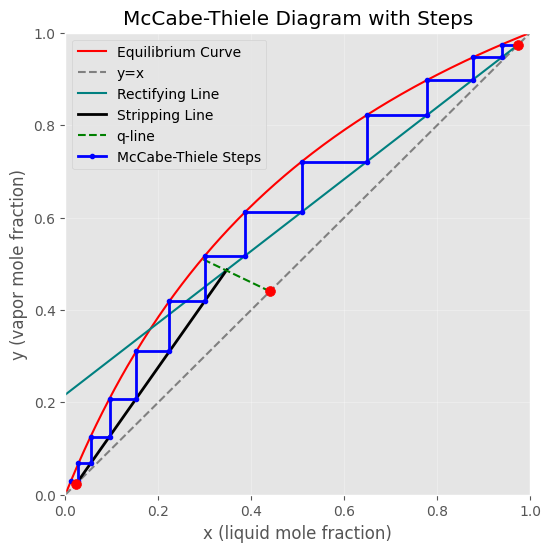

In [64]:
from IPython.display import Image
import matplotlib.pyplot as plt

# Calculating the stripping line slope
if q == 1:
    x_intersect_actual = xF
    y_intersect_actual = (R_actual/(R_actual+1))*xF + xD/(R_actual+1)
else:
    # Calculate intersection of rectifying line and q-line
    numerator = xD/(R_actual+1) + xF/(q-1)
    denominator = q/(q-1) - R_actual/(R_actual+1)
    x_intersect_actual = numerator / denominator
    y_intersect_actual = (R_actual/(R_actual+1))*x_intersect_actual + xD/(R_actual+1)

# Calculate stripping line slope
m_strip = (y_intersect_actual - xW) / (x_intersect_actual - xW)

print(f"Intersection: ({x_intersect_actual:.4f}, {y_intersect_actual:.4f})")
print(f"Stripping line slope: {m_strip:.4f}")

def eq(y):
    """Given y, return x on equilibrium curve"""
    x = y/(alpha+(1-alpha)*y)
    return x

def op(x):
    """Given x, return y on operating line"""
    if x > x_intersect_actual:
        # Rectifying section
        a = xD/(R_actual+1)
        b = R_actual/(R_actual+1)
        y = b*x + a
        return y
    elif x <= x_intersect_actual:
        # Stripping section - NOT q-line!
        y = m_strip*(x - xW) + xW
        return y

i = 0
x = [xD]
y = [xD]

while True:
    # Horizontal Step - move to equilibrium curve
    x.append(eq(y[-1]))
    y.append(y[-1])

    # Vertical step - move to operating line
    x.append(x[-1])
    y.append(op(x[-1]))

    # Updating number of stages
    i += 1
    print(f"Stage {i}: Last two points are: ({x[-1]:.4f}, {y[-1]:.4f}) and ({x[-2]:.4f}, {y[-2]:.4f})")

    # Ending loop
    if x[-1] <= xW:
        print(f"✓ Number of theoretical stages: {i}")
        i-=1
        del x[-1]
        del y[-1]
        break

    if abs(x[-2] - x[-1]) < 1e-5 and abs(y[-1] - y[-2]) < 1e-5:
        print("⚠ Convergence issue: points are not moving")
        i-=1
        del x[-1]
        del y[-1]
        break

    if i > 40:
        print("❌ Too many stages (>40). Check your parameters.")
        del x[-1]
        del y[-1]
        i-=1
        break

# Recreatinng the plot with all elements
plt.figure(figsize=(6,6))

# Plot equilibrium curve
plt.plot(x_plot, y_eq, label='Equilibrium Curve', color='red')

# Plot y=x
plt.plot([0,1],[0,1],'--', color='gray', label='y=x')

# Plot rectifying line
plt.plot([xD,0],[xD,y_axis_actual], label='Rectifying Line', color='teal')

# Plot stripping line
plt.plot([xW, x_intersect_actual], [xW, y_intersect_actual], color='black', linewidth=2, label='Stripping Line')

# Plot q-line
if q == 1.0:
    plt.axvline(x=xF, color='green', linestyle='--', label='q-line (vertical)')
else:
    if 'x_intersect' in globals() and 'y_intersect' in globals():
        plt.plot([xF,x_intersect],[xF,y_intersect], label='q-line', color='green', linestyle='--')

# Plotting key points
plt.scatter([xW,xF,xD],[xW,xF,xD], color='red', s=50, zorder=5)

# Plotting the McCabe-Thiele steps
plt.plot(x, y, color='blue', linewidth=2, label='McCabe-Thiele Steps', marker='o', markersize=3)

plt.xlabel('x (liquid mole fraction)')
plt.ylabel('y (vapor mole fraction)')
plt.title('McCabe-Thiele Diagram with Steps')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.savefig("Op_line_with_steps.png", dpi=300, bbox_inches='tight')
plt.show()

H = ((i-1)+2)*tray_spacing
n = i/tray_efficiency
n = m.ceil(n)

## Diameter Calculation

### Top Diameter

        FLV        K1
0  2.011738  0.015184
1  1.730196  0.017979
2  1.550516  0.020266
3  1.418358  0.021744
4  1.324414  0.023495


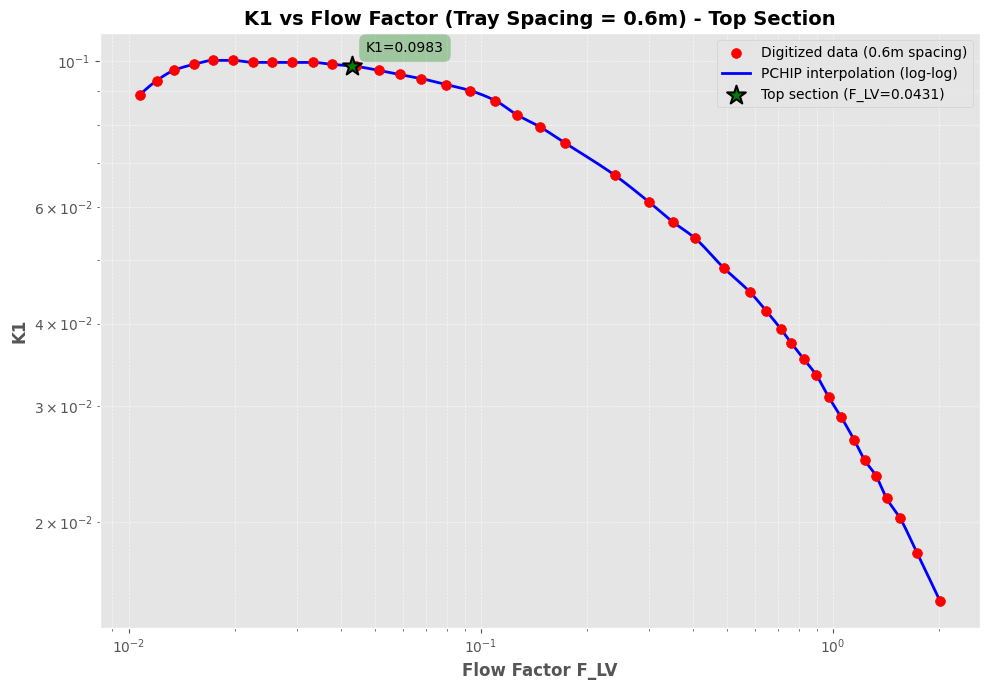


-----------------FLOW PARAMETERS------------------
L_top      = 536.04 kmol/h
V_top      = 689.20 kmol/h
F_LV       = 0.0431

--------------------VELOCITIES--------------------
K1         = 0.0983
u_flood    = 1.7695 m/s
u_opt      = 1.2386 m/s

----------------COLUMN DIMENSIONS-----------------
V_vol      = 19968.06 m³/h
A_hole     = 4.4781 m²
A_column   = 4.9756 m²
D_column   = 2.5170 m
--------------------------------------------------



In [65]:
from scipy.interpolate import PchipInterpolator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m

# ============================================================================
# TOP SECTION - FLOW RATES
# ============================================================================
L_top = (D * R_actual).item() if isinstance(D * R_actual, np.ndarray) else D * R_actual
V_top = (L_top + D).item() if isinstance(L_top + D, np.ndarray) else L_top + D
F_lv_top = ((L_top / V_top) * m.sqrt(rho_v_top / rho_l_top)).item() if isinstance((L_top / V_top) * m.sqrt(rho_v_top / rho_l_top), np.ndarray) else (L_top / V_top) * m.sqrt(rho_v_top / rho_l_top)

# ============================================================================
# K1 INTERPOLATION
# ============================================================================

# Importing data from GitHub Repository
url = "https://raw.githubusercontent.com/AdithyaR-ChemE/distillation-column-design-mccabe-thiele/main/flv_k1_lookup.csv"
df = pd.read_csv(url)  #
print(df.head())

df.columns = df.columns.str.strip()
FLV = df["FLV"].values
K1 = df["K1"].values

# Sort by FLV and remove duplicates
sort_idx = np.argsort(FLV)
FLV = FLV[sort_idx]
K1 = K1[sort_idx]
_, unique_idx = np.unique(FLV, return_index=True)
FLV = FLV[unique_idx]
K1 = K1[unique_idx]

# Convert to log space for interpolation
log_FLV = np.log10(FLV)
log_K1 = np.log10(K1)

# Build PCHIP interpolator
interp_func = PchipInterpolator(log_FLV, log_K1)

# Range check
if F_lv_top < FLV.min() or F_lv_top > FLV.max():
    print(f"⚠️ WARNING: F_lv_top = {F_lv_top:.6f} outside data range [{FLV.min():.4f}, {FLV.max():.4f}]")
    print("   Extrapolation may be inaccurate!")

# Predict K1 and convert back from log space
log_K1_top = float(interp_func(np.log10(F_lv_top)))
K1_top = 10 ** log_K1_top

# ============================================================================
# PLOT
# ============================================================================

FLV_fine = np.logspace(np.log10(FLV.min()), np.log10(FLV.max()), 500)
K1_smooth = 10 ** interp_func(np.log10(FLV_fine))

plt.figure(figsize=(10, 7))
plt.scatter(FLV, K1, color='red', s=50, label='Digitized data (0.6m spacing)', zorder=5)
plt.plot(FLV_fine, K1_smooth, color='blue', linewidth=2, label='PCHIP interpolation (log-log)')
plt.scatter([F_lv_top], [K1_top], color='green', s=200, marker='*',
            label=f'Top section (F_LV={F_lv_top:.4f})', zorder=6, edgecolors='black', linewidths=1.5)
plt.annotate(f'K1={K1_top:.4f}', xy=(F_lv_top, K1_top),
             xytext=(10, 10), textcoords='offset points', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.5', fc='green', alpha=0.3))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Flow Factor F_LV', fontsize=12, fontweight='bold')
plt.ylabel('K1', fontsize=12, fontweight='bold')
plt.title('K1 vs Flow Factor (Tray Spacing = 0.6m) - Top Section', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, which='both', ls='--', lw=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# ============================================================================
# COLUMN SIZING
# ============================================================================

uf_top = K1_top * m.sqrt((rho_l_top - rho_v_top) / rho_v_top)
uf_opt = 0.7 * uf_top

V_top_vol = (V_top * 8.314 * (T_top + 273)) / 101.325
A_hole_top = V_top_vol / (uf_opt * 3600)
A_col_top = A_hole_top / 0.9
D_top = m.sqrt(A_col_top * 4 / m.pi)

# ============================================================================
# RESULTS
# ============================================================================

print(f"\n{'FLOW PARAMETERS':-^50}")
print(f"L_top      = {L_top:.2f} kmol/h")
print(f"V_top      = {V_top:.2f} kmol/h")
print(f"F_LV       = {F_lv_top:.4f}")

print(f"\n{'VELOCITIES':-^50}")
print(f"K1         = {K1_top:.4f}")
print(f"u_flood    = {uf_top:.4f} m/s")
print(f"u_opt      = {uf_opt:.4f} m/s")

print(f"\n{'COLUMN DIMENSIONS':-^50}")
print(f"V_vol      = {V_top_vol:.2f} m³/h")
print(f"A_hole     = {A_hole_top:.4f} m²")
print(f"A_column   = {A_col_top:.4f} m²")
print(f"D_column   = {D_top:.4f} m")
print(f"{'':-^50}\n")

### Bottom Diameter

In [66]:
# Vapor flowrate at the bottom
V_bottom = V_top - (1-q)*F

# Vapor flowrate at the bottom
L_bottom = V_bottom + L


# Flow factor
F_lv_bottom = (L_bottom/V_bottom)*m.sqrt(rho_v_bottom/rho_l_bottom)

# Predict K1 at bottom using the existing interpolator
log_K1_bottom = interp_func(np.log10(F_lv_bottom)).item()
K1_bottom = 10 ** log_K1_bottom

# Flooding Velocity
uf_bottom = K1_bottom*m.sqrt( (rho_l_bottom - rho_v_bottom)/rho_v_bottom)
uf_opt_bottom = 0.7*uf_bottom

# Volumetric Vapor Flowrate
V_bottom_vol = (V_bottom*8.314*(T_bottom+273))/101.325
A_hole_bottom = V_bottom_vol/(uf_opt_bottom*3600)
A_col_bottom = A_hole_bottom/0.9
D_bottom = np.sqrt(A_col_bottom*4/m.pi)

print("\n-----------------FLOW PARAMETERS------------------")
print(f"L_bottom      = {np.squeeze(L_bottom):.2f} kmol/h")
print(f"V_bottom      = {np.squeeze(V_bottom):.2f} kmol/h")
print(f"F_LV          = {np.squeeze(F_lv_bottom):.4f}")

print("\n--------------------VELOCITIES--------------------")
print(f"K1             = {K1_bottom:.4f}")
print(f"u_flood        = {uf_bottom:.4f} m/s")
print(f"u_opt          = {uf_opt_bottom:.4f} m/s")

print("\n----------------COLUMN DIMENSIONS-----------------")
print(f"V_vol          = {np.squeeze(V_bottom_vol):.2f} m³/h")
print(f"A_hole         = {np.squeeze(A_hole_bottom):.4f} m²")
print(f"A_column       = {np.squeeze(A_col_bottom):.4f} m²")
print(f"D_column       = {np.squeeze(D_bottom):.4f} m")
print("--------------------------------------------------\n")


-----------------FLOW PARAMETERS------------------
L_bottom      = 652.43 kmol/h
V_bottom      = 456.08 kmol/h
F_LV          = 0.0828

--------------------VELOCITIES--------------------
K1             = 0.0917
u_flood        = 1.5815 m/s
u_opt          = 1.1071 m/s

----------------COLUMN DIMENSIONS-----------------
V_vol          = 14355.44 m³/h
A_hole         = 3.6020 m²
A_column       = 4.0022 m²
D_column       = 2.2574 m
--------------------------------------------------



### Final D and N

In [67]:
# Setting column diameter to the larger of top and bottom diameters

D_final = float(max(np.squeeze(D_top), np.squeeze(D_bottom)))
print(f"Thus, Final Column Diameter: {D_final:.6f} m")

Thus, Final Column Diameter: 2.516971 m


# Final Results

In [68]:
import pandas as pd
import numpy as np

# ===== Display neatly =====
print("\n" + "="*70)
print(f"{'DISTILLATION COLUMN DESIGN SUMMARY':^70}")
print("="*70)

# --- TOP SECTION ---
print("\n--- TOP SECTION ---")
print(f"{'Liquid Flowrate (L_top)':40s}: {np.squeeze(L_top):10.3f} kmol/h")
print(f"{'Vapor Flowrate (V_top)':40s}: {np.squeeze(V_top):10.3f} kmol/h")
print(f"{'Flow Factor (F_lv_top)':40s}: {np.squeeze(F_lv_top):10.4f}")
print(f"{'K1 (Top)':40s}: {K1_top:10.4f}")
print(f"{'Flooding Velocity (uf_top)':40s}: {uf_top:10.3f} m/s")
print(f"{'Optimum Velocity (uf_opt)':40s}: {uf_opt:10.3f} m/s")
print(f"{'Volumetric Vapor Flowrate':40s}: {np.squeeze(V_top_vol):10.3f} m³/h")
print(f"{'Active Area (A_hole_top)':40s}: {np.squeeze(A_hole_top):10.3f} m²")
print(f"{'Column Area (A_col_top)':40s}: {np.squeeze(A_col_top):10.3f} m²")
print(f"{'Top Diameter (D_top)':40s}: {np.squeeze(D_top):10.3f} m")

# --- BOTTOM SECTION ---
print("\n--- BOTTOM SECTION ---")
print(f"{'Liquid Flowrate (L_bottom)':40s}: {np.squeeze(L_bottom):10.3f} kmol/h")
print(f"{'Vapor Flowrate (V_bottom)':40s}: {np.squeeze(V_bottom):10.3f} kmol/h")
print(f"{'Flow Factor (F_lv_bottom)':40s}: {np.squeeze(F_lv_bottom):10.4f}")
print(f"{'K1 (Bottom)':40s}: {K1_bottom:10.4f}")
print(f"{'Flooding Velocity (uf_bottom)':40s}: {uf_bottom:10.3f} m/s")
print(f"{'Optimum Velocity (uf_opt_bottom)':40s}: {uf_opt_bottom:10.3f} m/s")
print(f"{'Volumetric Vapor Flowrate':40s}: {np.squeeze(V_bottom_vol):10.3f} m³/h")
print(f"{'Active Area (A_hole_bottom)':40s}: {np.squeeze(A_hole_bottom):10.3f} m²")
print(f"{'Column Area (A_col_bottom)':40s}: {np.squeeze(A_col_bottom):10.3f} m²")
print(f"{'Bottom Diameter (D_bottom)':40s}: {np.squeeze(D_bottom):10.3f} m")

# --- COLUMN OVERALL ---
print("\n--- COLUMN OVERALL ---")
print(f"{'Number of Theoretical Stages':40s}: {i:10d}")
print(f"{'Number of Actual Stages':40s}: {n:10d}")
print(f"{'Height of Column (H_column)':40s}: {H:10.2f} m")
print(f"{'Final Column Diameter (D_final)':40s}: {D_final:10.3f} m")

print("\n" + "-"*70 + "\n")



                  DISTILLATION COLUMN DESIGN SUMMARY                  

--- TOP SECTION ---
Liquid Flowrate (L_top)                 :    536.043 kmol/h
Vapor Flowrate (V_top)                  :    689.199 kmol/h
Flow Factor (F_lv_top)                  :     0.0431
K1 (Top)                                :     0.0983
Flooding Velocity (uf_top)              :      1.769 m/s
Optimum Velocity (uf_opt)               :      1.239 m/s
Volumetric Vapor Flowrate               :  19968.055 m³/h
Active Area (A_hole_top)                :      4.478 m²
Column Area (A_col_top)                 :      4.976 m²
Top Diameter (D_top)                    :      2.517 m

--- BOTTOM SECTION ---
Liquid Flowrate (L_bottom)              :    652.426 kmol/h
Vapor Flowrate (V_bottom)               :    456.084 kmol/h
Flow Factor (F_lv_bottom)               :     0.0828
K1 (Bottom)                             :     0.0917
Flooding Velocity (uf_bottom)           :      1.582 m/s
Optimum Velocity (uf_opt_bottom)   